In [1]:
TRAIN_CSV_PATH = r"../datasets/train.csv"
PRICES_CSV_PATH = r"../datasets/prices.csv"
CAL_CSV_PATH = r"../datasets/calendar.csv"

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_train = pd.read_csv(TRAIN_CSV_PATH)
df_prices = pd.read_csv(PRICES_CSV_PATH)
df_cal = pd.read_csv(CAL_CSV_PATH)

### Metadata for train csv

id - an id identifying the smallest data granularity for which the forecast will be assessed: by product and by store

item_id - the id of the item

subcat_id - the id of the subcategory the item belongs to

category_id - the id of the category the item belongs to

store_id - the id of the store the product is sold at

region_id - the id of the region the store is located in

wm_yr_wk - week encoding

In [4]:
df_train.head()

,id,item_id,subcat_id,category_id,store_id,region_id,d_1,d_2,d_3,d_4,...,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919
0,Beauty_1_001_East_1,Beauty_1_001,Beauty_1,Beauty,East_1,East,0,0,0,0,...,3,0,1,1,0,0,0,2,0,3
1,Beauty_1_002_East_1,Beauty_1_002,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,Beauty_1_003_East_1,Beauty_1_003,Beauty_1,Beauty,East_1,East,0,0,0,0,...,0,1,1,1,0,0,1,1,0,2
3,Beauty_1_004_East_1,Beauty_1_004,Beauty_1,Beauty,East_1,East,0,0,0,0,...,1,3,7,2,0,0,1,2,4,1
4,Beauty_1_005_East_1,Beauty_1_005,Beauty_1,Beauty,East_1,East,0,0,0,0,...,2,2,2,4,1,0,2,3,1,0


In [6]:
df_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,East_1,Beauty_1_001,11325,9.58
1,East_1,Beauty_1_001,11326,9.58
2,East_1,Beauty_1_001,11327,8.26
3,East_1,Beauty_1_001,11328,8.26
4,East_1,Beauty_1_001,11329,8.26


In [10]:
df_prices["store_id"] = df_prices["store_id"].astype("string")
df_prices["item_id"] = df_prices["item_id"].astype("string")
df_prices["wm_yr_wk"] = df_prices["wm_yr_wk"].astype(int)
df_prices["sell_price"] = df_prices["sell_price"].astype(float)

In [13]:
df_cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d
0,2011-01-29,11101,Saturday,1,1,2011,d_1
1,2011-01-30,11101,Sunday,2,1,2011,d_2
2,2011-01-31,11101,Monday,3,1,2011,d_3
3,2011-02-01,11101,Tuesday,4,2,2011,d_4
4,2011-02-02,11101,Wednesday,5,2,2011,d_5


In [13]:
# Change dtypes
df_cal["date"] = pd.to_datetime(df_cal["date"])
df_cal["weekday"] = df_cal["weekday"].astype("string")
df_cal["d"] = df_cal["d"].astype("string")

### Data cleaning on train.csv

In [14]:
# Check NAs: All filled
df_train.isna().sum().sum()

0

In [15]:
df_train.dtypes

id             object
item_id        object
subcat_id      object
category_id    object
store_id       object
                ...  
d_1915          int64
d_1916          int64
d_1917          int64
d_1918          int64
d_1919          int64
Length: 1925, dtype: object

In [16]:
# Convert to appropriate datatypes
df_train["id"] = df_train["id"].astype("string")
df_train["item_id"] = df_train["item_id"].astype("string")
df_train["subcat_id"] = df_train["subcat_id"].astype("string")
df_train["category_id"] = df_train["category_id"].astype("string")
df_train["store_id"] = df_train["store_id"].astype("string")
df_train["region_id"] = df_train["region_id"].astype("string")

In [17]:
df_train.dtypes

id             string
item_id        string
subcat_id      string
category_id    string
store_id       string
                ...  
d_1915          int64
d_1916          int64
d_1917          int64
d_1918          int64
d_1919          int64
Length: 1925, dtype: object

### EDA on train.csv

In [18]:
# Number of unique items for each category
len(df_train["item_id"].unique())

3049

In [15]:
print(df_train["category_id"].unique())
print(df_train["store_id"].unique())
print(df_train["region_id"].unique())

['Beauty' 'Cleaning' 'Food']
['East_1' 'East_2' 'East_3' 'East_4' 'Central_1' 'Central_2' 'Central_3'
 'West_1' 'West_2' 'West_3']
['East' 'Central' 'West']


In [16]:
# Save the unique demographic labels for plotting later
category_ls = list(df_train["category_id"].unique())
store_ls = list(df_train["store_id"].unique())
region_ls = list(df_train["region_id"].unique())

In [21]:
# Save day IDs from train
day_ids = list(df_train.columns[6:])

#### Breakdown of items
30490 total records

1919 days of no. of items sold

3049 items

3 categories of items (beauty, cleaning, food)

10 different stores

3 different regions (east, central west)

#### Plots to visualise the number of items sold for each type of cross-sectional data over the 1919 days

In [34]:
df_items_temp = df_train[["id"]+day_ids].T
df_items_temp.columns = df_items_temp.iloc[0, :]

# Drop first row
df_items_temp = df_items_temp.iloc[1: , :]

# Copy the index to merge date
df_items_temp["d"] = df_items_temp.index

# Merge date into df
df_items_temp = pd.merge(df_items_temp, df_cal, on = "d", how = "left")
df_items_temp = df_items_temp.set_index("date")

# Calculate average items across items per day
df_items_temp["avg_items_sold"] = df_items_temp[list(df_train["id"])].mean(axis = 1)


<AxesSubplot:xlabel='date'>

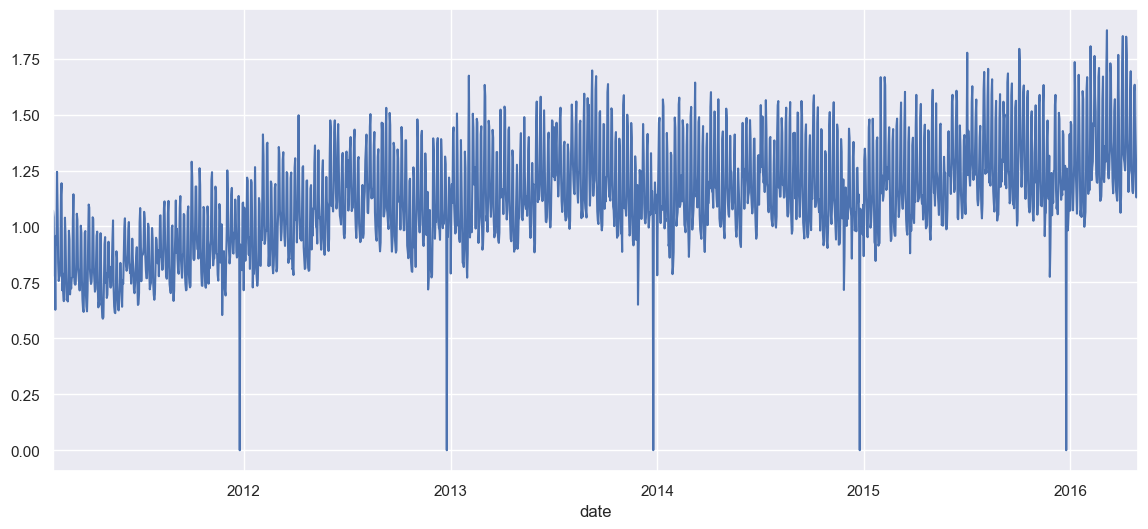

In [87]:
sns.set(rc={'figure.figsize':(14, 6)})

df_items_temp["avg_items_sold"].plot()

<AxesSubplot:xlabel='date'>

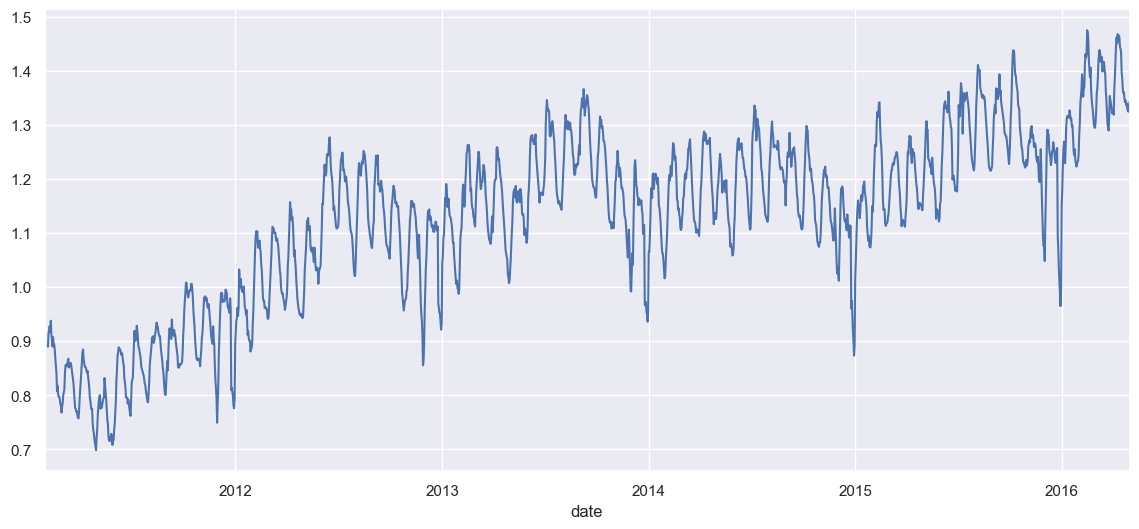

In [88]:
# Rolling 7 days average
df_items_temp["avg_items_sold"].rolling(7).mean().plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

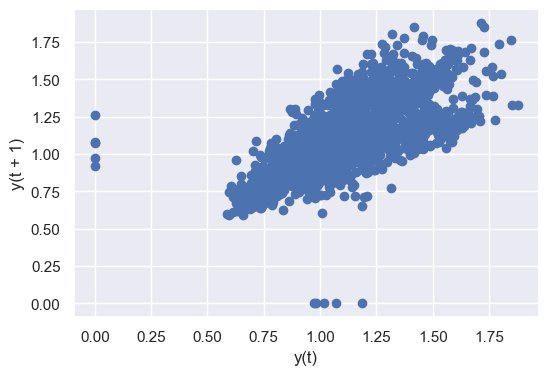

In [59]:
sns.set(rc={'figure.figsize':(6, 4)})

pd.plotting.lag_plot(df_items_temp["avg_items_sold"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 7)'>

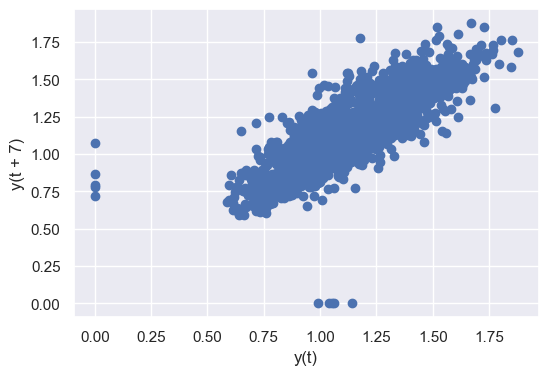

In [60]:
pd.plotting.lag_plot(df_items_temp["avg_items_sold"], lag = 7)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 14)'>

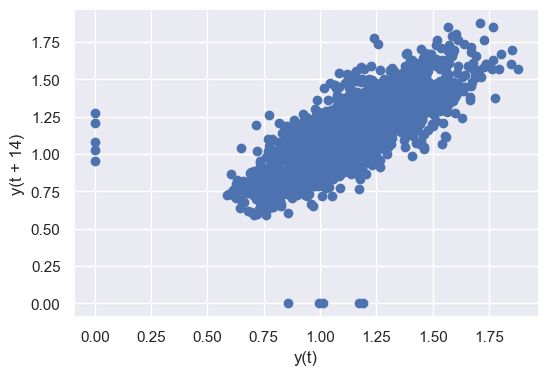

In [61]:
pd.plotting.lag_plot(df_items_temp["avg_items_sold"], lag = 14)

In [55]:
# Items averaged over the category
df_cat_temp = df_train.groupby(["category_id"]).mean()
df_cat_temp.reset_index(inplace=True)

df_cat_temp = pd.DataFrame(
    data = {
    "d" : df_cat_temp.columns[1:],
    "Beauty" : df_cat_temp.iloc[0, 1:],
    "Cleaning" : df_cat_temp.iloc[1, 1:],
    "Food" : df_cat_temp.iloc[2, 1:]
    }
)

df_cat_temp["d"] = df_cat_temp["d"].astype("string")

df_cat_temp = pd.merge(df_cat_temp, df_cal, on = "d", how = "left")
df_cat_temp = df_cat_temp.set_index("date")

<AxesSubplot:xlabel='date'>

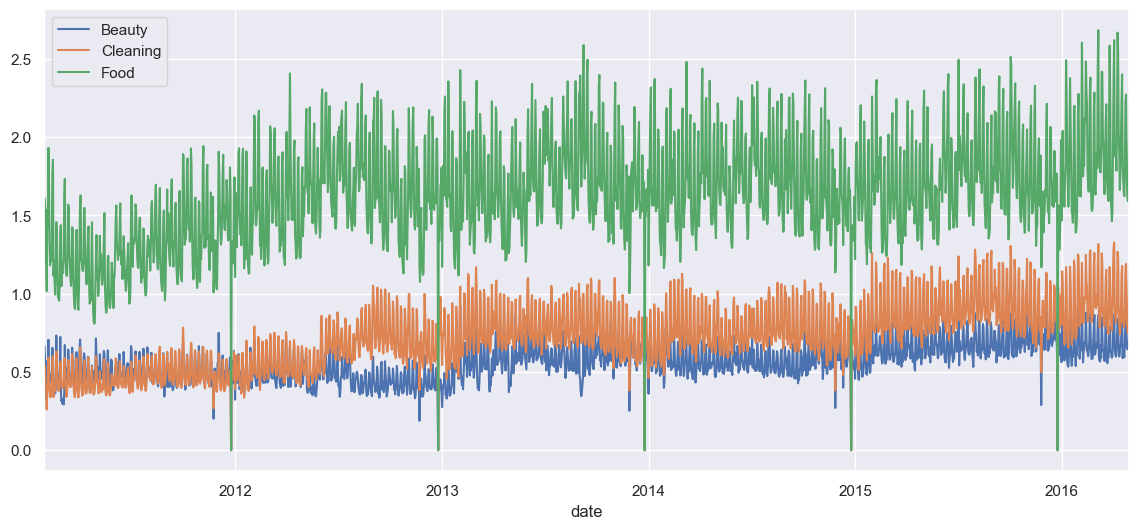

In [84]:
sns.set(rc={'figure.figsize':(14, 6)})

df_cat_temp[category_ls].plot()

<AxesSubplot:xlabel='date'>

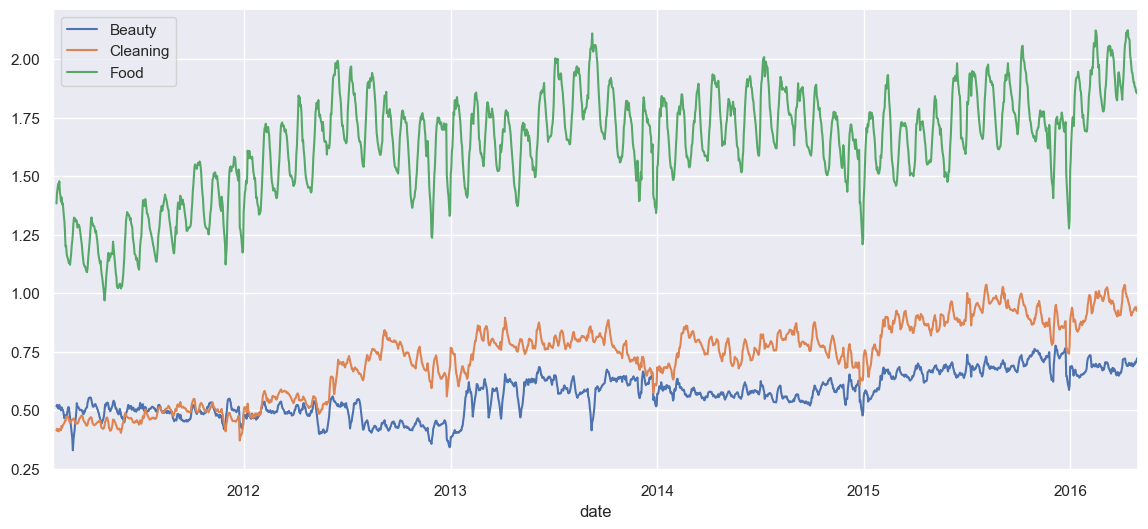

In [85]:
# Rolling 7 days average
df_cat_temp[category_ls].rolling(7).mean().plot()

<AxesSubplot:xlabel='date'>

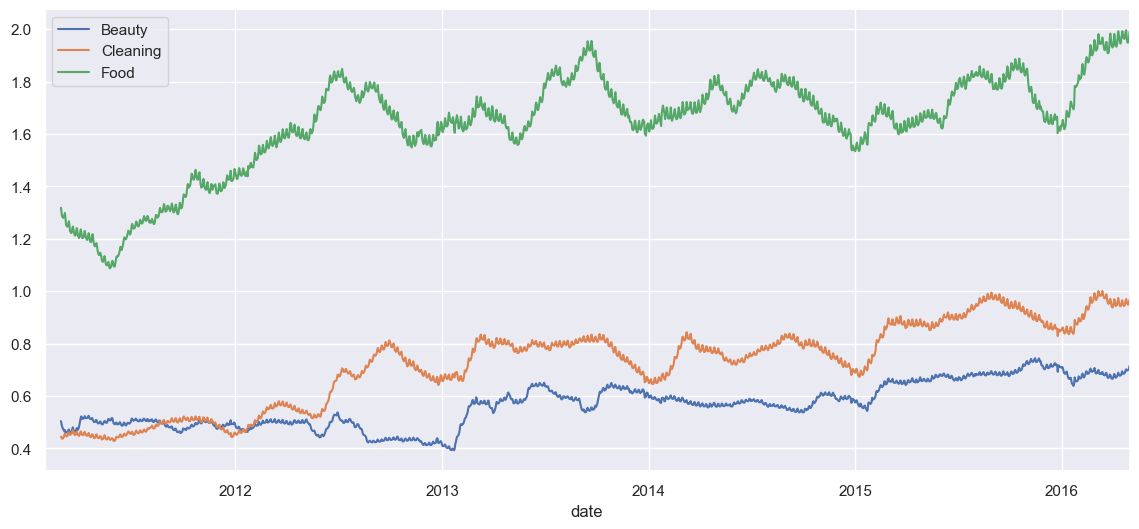

In [86]:
# Rolling 30 days average
df_cat_temp[category_ls].rolling(30).mean().plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

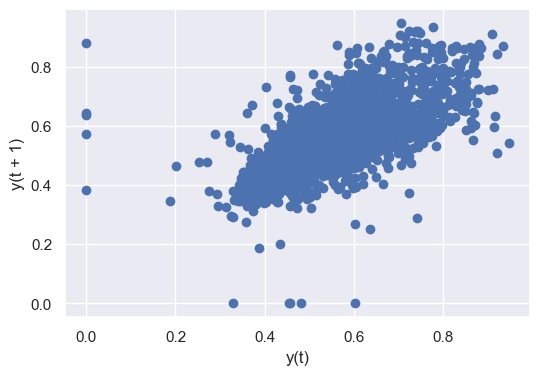

In [62]:
sns.set(rc={'figure.figsize':(6, 4)})

# Lag plots
pd.plotting.lag_plot(df_cat_temp["Beauty"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

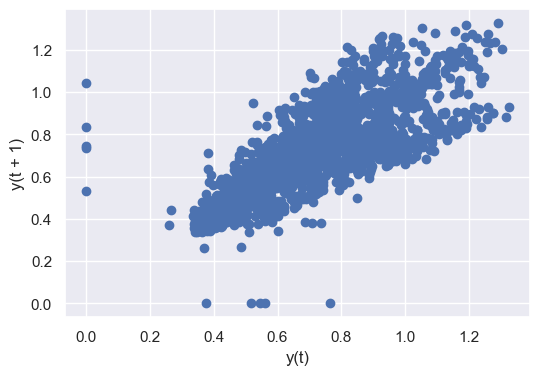

In [63]:
pd.plotting.lag_plot(df_cat_temp["Cleaning"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

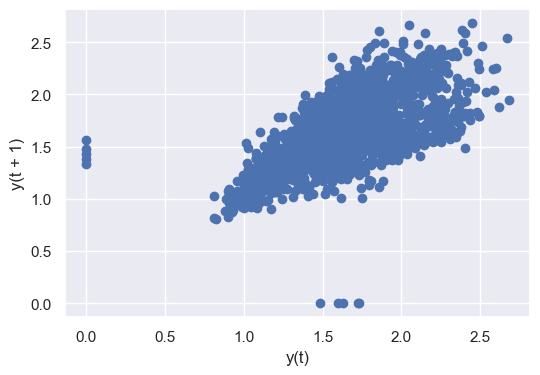

In [64]:
pd.plotting.lag_plot(df_cat_temp["Food"], lag = 1)

In [65]:
# Items averaged over the stores
df_store_temp = df_train.groupby(["store_id"]).mean()
df_store_temp.reset_index(inplace=True)

df_store_temp = pd.DataFrame(
    data = {
    "d" : df_store_temp.columns[1:],
    "Central_1" : df_store_temp.iloc[0, 1:],
    "Central_2" : df_store_temp.iloc[1, 1:],
    "Central_3" : df_store_temp.iloc[2, 1:],
    "East_1" : df_store_temp.iloc[3, 1:],
    "East_2" : df_store_temp.iloc[4, 1:],
    "East_3" : df_store_temp.iloc[5, 1:],
    "East_4" : df_store_temp.iloc[6, 1:],
    "West_1" : df_store_temp.iloc[7, 1:],
    "West_2" : df_store_temp.iloc[8, 1:],
    "West_3" : df_store_temp.iloc[9, 1:],
    }
)

df_store_temp["d"] = df_store_temp["d"].astype("string")

df_store_temp = pd.merge(df_store_temp, df_cal, on = "d", how = "left")
df_store_temp = df_store_temp.set_index("date")

<AxesSubplot:xlabel='date'>

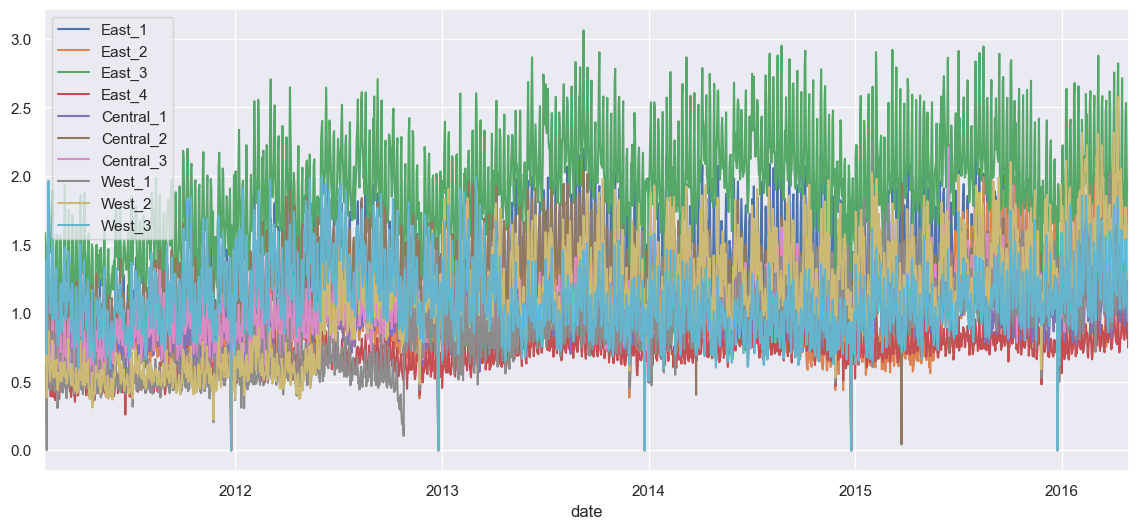

In [81]:
sns.set(rc={'figure.figsize':(14, 6)})

df_store_temp[store_ls].plot()

<AxesSubplot:xlabel='date'>

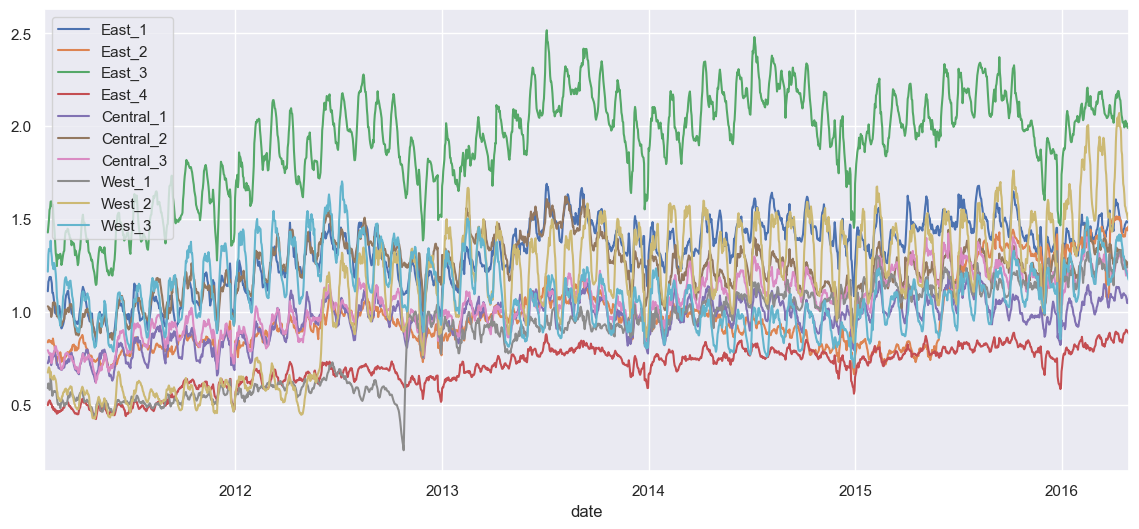

In [82]:
# 7 days rolling average
df_store_temp[store_ls].rolling(7).mean().plot()

<AxesSubplot:xlabel='date'>

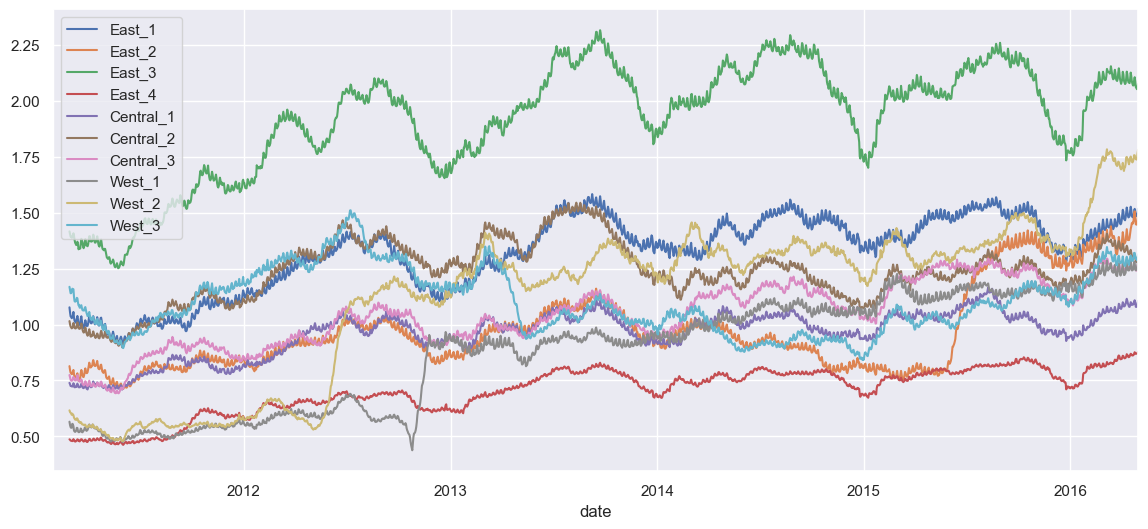

In [83]:
# 30 days rolling average
df_store_temp[store_ls].rolling(30).mean().plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

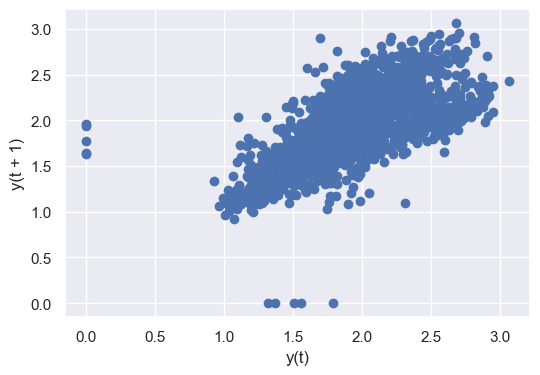

In [70]:
sns.set(rc={'figure.figsize':(6, 4)})

# Highest number of items sold
pd.plotting.lag_plot(df_store_temp["East_3"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

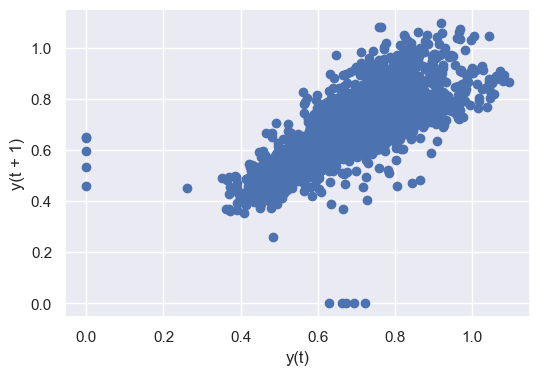

In [71]:
# Lowest number of items sold
pd.plotting.lag_plot(df_store_temp["East_4"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

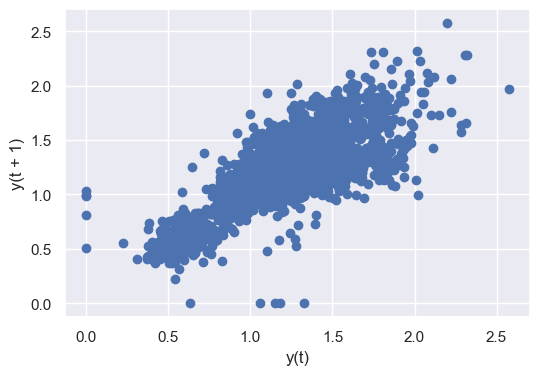

In [72]:
# Chose this since west_2 has a sudden spike around mid 2012
pd.plotting.lag_plot(df_store_temp["West_2"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

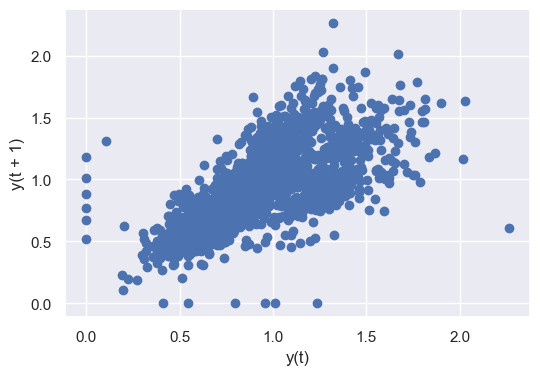

In [73]:
# West 1 also had a sudden spike around Oct 2012
pd.plotting.lag_plot(df_store_temp["West_1"], lag = 1)

In [74]:
# Items averaged over the regions
df_region_temp = df_train.groupby(["region_id"]).mean()
df_region_temp.reset_index(inplace=True)

df_region_temp = pd.DataFrame(
    data = {
    "d" : df_region_temp.columns[1:],
    "Central" : df_region_temp.iloc[0, 1:],
    "East" : df_region_temp.iloc[1, 1:],
    "West" : df_region_temp.iloc[2, 1:],
    }
)

df_region_temp["d"] = df_region_temp["d"].astype("string")

df_region_temp = pd.merge(df_region_temp, df_cal, on = "d", how = "left")
df_region_temp = df_region_temp.set_index("date")

<AxesSubplot:xlabel='date'>

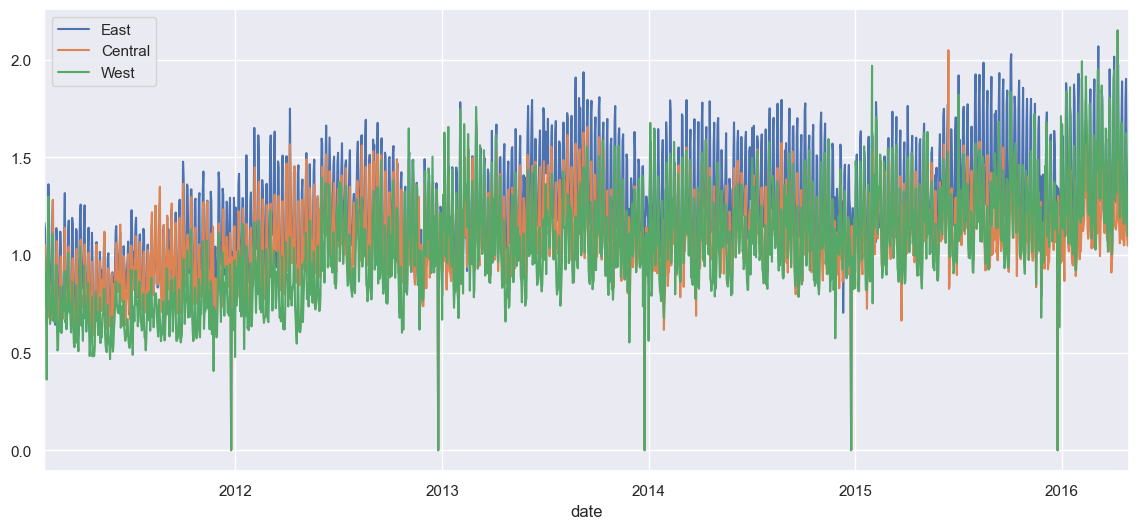

In [75]:
sns.set(rc={'figure.figsize':(14, 6)})

df_region_temp[region_ls].plot()

<AxesSubplot:xlabel='date'>

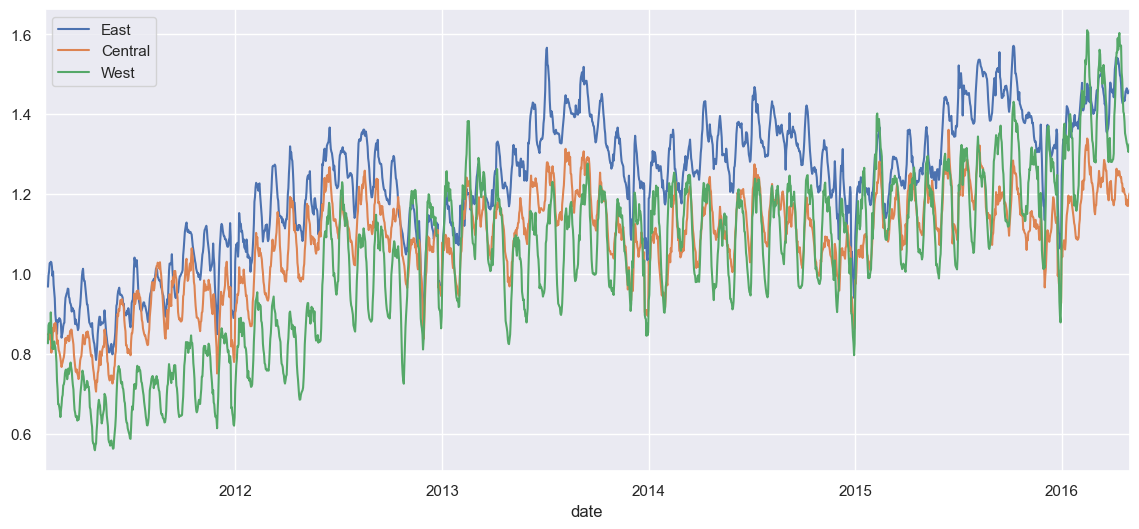

In [76]:
# 7 days rolling average
df_region_temp[region_ls].rolling(7).mean().plot()

<AxesSubplot:xlabel='date'>

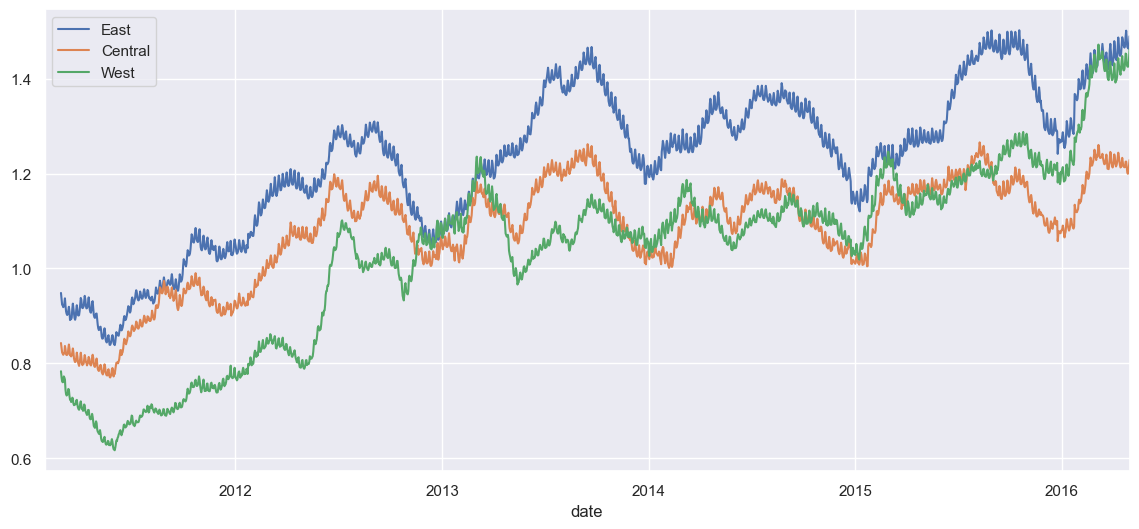

In [77]:
# 30 days rolling average
df_region_temp[region_ls].rolling(30).mean().plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

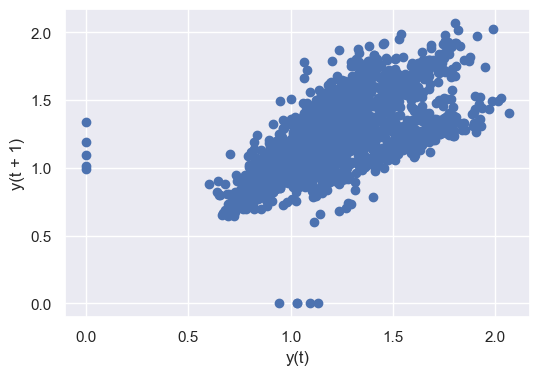

In [78]:
sns.set(rc={'figure.figsize':(6, 4)})

pd.plotting.lag_plot(df_region_temp["East"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

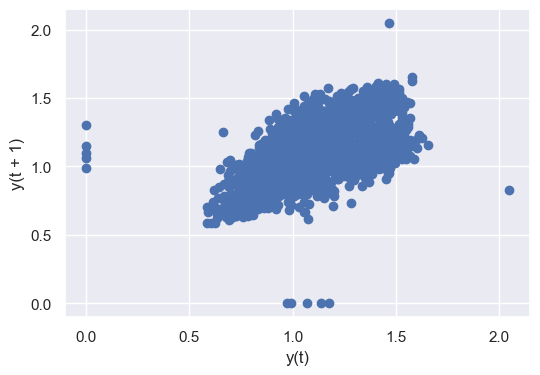

In [79]:
pd.plotting.lag_plot(df_region_temp["Central"], lag = 1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

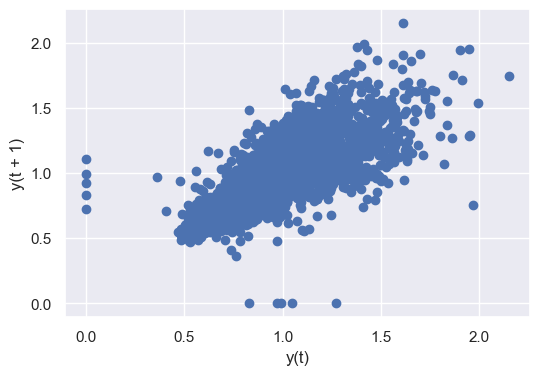

In [80]:
pd.plotting.lag_plot(df_region_temp["West"], lag = 1)